In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

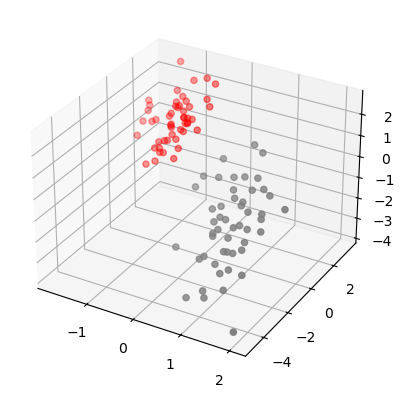

In [2]:
inputs = make_classification(
    n_samples=100,
    n_features=3,
    n_informative=2,
    n_redundant=1,
    n_clusters_per_class=1,
    random_state=8,
)

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

x = inputs[0]
y = inputs[1]
color = ["red" if y_i == 1 else "grey" for y_i in y]
ax.scatter(x[:, 0], x[:, 1], x[:, 2], color=color)
plt.show()

In [3]:
class PCA:
    def __init__(self, num_components):
        self.num_components = num_components
        # mean values of each feature
        self.mean = None
        # principal component weights
        self.components = None
        # proportion of variance explained by principal components
        self.explained_variance = None

    def fit(self, x):
        # data centering
        self.mean = np.mean(x)
        x -= self.mean
        # calculate cov matrix and eigenvalues and vectors
        # transposed because the function needs samples as columns
        # transpose eigenvectors so confirm with common POV
        cov_matrix = np.cov(x.T)
        eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
        eigenvectors = eigenvectors.T
        # sort eigenvalues and eigenvectors
        sort_idx = np.argsort(eigenvalues)[::-1]
        eigenvalues = eigenvalues[sort_idx]
        eigenvectors = eigenvectors[sort_idx]

        # store principal components & variance
        self.components = eigenvectors[: self.num_components]
        self.variance_share = np.sum(eigenvalues[: self.num_components]) / np.sum(eigenvalues)

    def transform(self, x):
        # data centering
        x -= self.mean
        return np.dot(x, self.components.T)

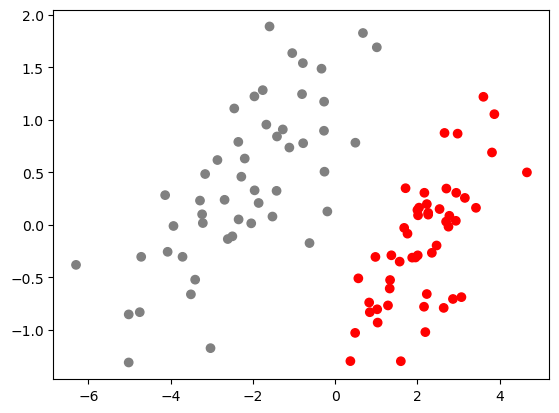

In [4]:
pca = PCA(num_components=2)
pca.fit(x)
x_transformed = pca.transform(x)

plt.scatter(x_transformed[:, 0], x_transformed[:, 1], color=color)
plt.show()

# Explaination

## What is inputs.T doing?

T is transposing our data.

In [5]:
x.shape

(100, 3)

In [6]:
x.T.shape

(3, 100)

In [7]:
x[:, 0] == x.T[0]

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

## What is covariance matrix?

Covariance indicates the level to which two variables vary together.

In [8]:
cov_matrix = np.cov(x.T)
cov_matrix

array([[ 1.26067187, -1.81730627, -1.03548782],
       [-1.81730627,  3.71293034,  2.64407488],
       [-1.03548782,  2.64407488,  2.0631668 ]])

This is it implemented from scratch.

In [9]:
i = x.T[0]  # feature 1
j = x.T[1]  # feature 2


def covariance(i, j):
    """Calculates covariance."""
    i_mean = np.mean(i)
    j_mean = np.mean(j)
    cov = sum((i - i_mean) * (j - j_mean)) / (len(i) - 1)
    return cov


print(f"i j = {covariance(i, j)}")
print(f"j i = {covariance(j, i)}")
print(f"i i = {covariance(i, i)}")
print(f"j j = {covariance(j, j)}")

i j = -1.8173062699776563
j i = -1.8173062699776563
i i = 1.2606718700745958
j j = 3.712930343096273


## What is eigenvalues?

**Eigenvectors** are special vectors that, when multiplied by a matrix, give back a scaled version of themselves. The scaling factor is called the **eigenvalue**.

In [10]:
result = np.linalg.eig(cov_matrix)
result

EigResult(eigenvalues=array([ 6.48534268e+00,  5.51426333e-01, -2.66439451e-16]), eigenvectors=array([[-0.37002017,  0.82215629, -0.43260156],
       [ 0.75664392, -0.00348975, -0.65381787],
       [ 0.53905014,  0.56925114,  0.62078828]]))

In [11]:
matrix = [[-3, 1], [-2, 0]]
eigenvector = [[1], [1]]
np.dot(matrix, eigenvector) / eigenvector # eigenvalue = -2

array([[-2.],
       [-2.]])

In [12]:
a = cov_matrix
b = result.eigenvectors[:, 0].reshape(3, 1) # one of three eigenvctors
np.dot(a, b) / b # eigenvalue

array([[6.48534268],
       [6.48534268],
       [6.48534268]])

In our case, eigenvectors point in the direction of the maximum variance and corresponding eigenvalues indicate the importance of its eigenvector.

## What is that sorting?

In [13]:
a = [100, 200, 300]

This sorts in ascending order.

In [14]:
np.argsort(a)

array([0, 1, 2])

This sorts in descending order.

In [15]:
np.argsort(a)[::-1]

array([2, 1, 0])

So it means we are sorthing the eigenvalues and eigenvectors by eigenvalues descending.

## What is the output of `np.linalg.eig()`?

In [16]:
a = [[-6, 3], [4, 5]]
eigenvalues, eigenvectors = np.linalg.eig(a)
eigenvalues_1 = eigenvalues[-1]
eigenvectors_1 = eigenvectors[:, -1]
magnitude = np.sqrt(np.sum(np.multiply(eigenvectors_1, eigenvectors_1)))
print(magnitude)

1.0


The eigenvectors need to be transposed to confirm with our common understanding.

In [17]:
eigenvectors[:, -1] == eigenvectors.T[1]

array([ True,  True])

# Implementation Based On Statquest

This is an implementation of [StatQuest: Principal Component Analysis (PCA), Step-by-Step](https://www.youtube.com/watch?v=FgakZw6K1QQ).

In [30]:
import pandas as pd
import seaborn as sns

data = {
    "mouse_1": [10, 6],
    "mouse_2": [11, 4],
    "mouse_3": [8, 5],
    "mouse_4": [3, 3],
    "mouse_5": [1, 2.8],
    "mouse_6": [2, 1],
}

dataset = pd.DataFrame(data, dtype=np.float32, index=["gene_1", "gene_2"])
dataset = dataset.transpose()
dataset

,gene_1,gene_2
mouse_1,10.0,6.0
mouse_2,11.0,4.0
mouse_3,8.0,5.0
mouse_4,3.0,3.0
mouse_5,1.0,2.8
mouse_6,2.0,1.0


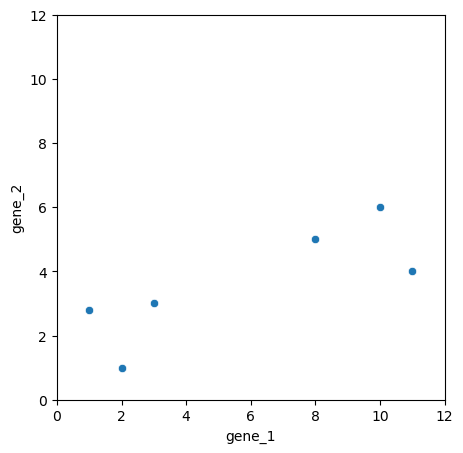

In [111]:
plt.figure(figsize=(5, 5))
plt.ylim(0, 12)
plt.xlim(0, 12)
sns.scatterplot(x=dataset["gene_1"], y=dataset["gene_2"])
plt.show()

First we will calcilate the center of the data.

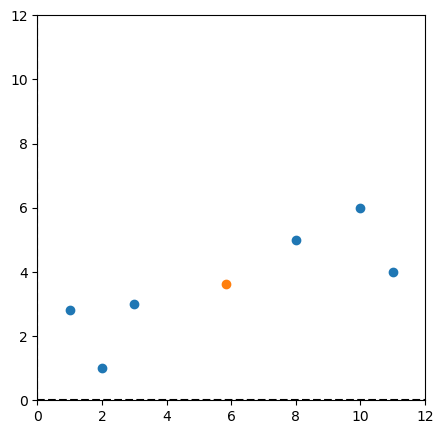

In [112]:
plt.figure(figsize=(5, 5))
plt.ylim(0, 12)
plt.xlim(0, 12)

plt.scatter(dataset["gene_1"], dataset["gene_2"])
plt.scatter(dataset.mean().values[0], dataset.mean().values[1])
plt.axhline(y=0, color='black', linestyle='--')  # x-axis
plt.axvline(x=0, color='black', linestyle='--')  # y-axis
plt.show()

Then, we will center the data so that the center is at the origin.

In [75]:
dataset_centered = dataset.copy()
dataset_centered["gene_1"] = dataset["gene_1"] - dataset["gene_1"].mean()
dataset_centered["gene_2"] = dataset["gene_2"] - dataset["gene_2"].mean()

print(dataset_centered.mean().round(5))
dataset_centered

gene_1   -0.0
gene_2    0.0
dtype: float32


,gene_1,gene_2
mouse_1,4.166667,2.366667
mouse_2,5.166667,0.366667
mouse_3,2.166667,1.366667
mouse_4,-2.833333,-0.633333
mouse_5,-4.833333,-0.833333
mouse_6,-3.833333,-2.633333


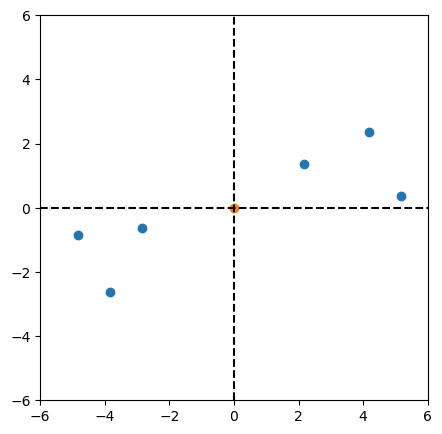

In [116]:
plt.figure(figsize=(5, 5))
plt.ylim(-6, 6)
plt.xlim(-6, 6)

plt.scatter(dataset_centered["gene_1"], dataset_centered["gene_2"])
plt.scatter(dataset_centered.mean().values[0], dataset_centered.mean().values[1])
plt.axhline(y=0, color='black', linestyle='--')  # x-axis
plt.axvline(x=0, color='black', linestyle='--')  # y-axis
plt.show()

Then, initiate a random line

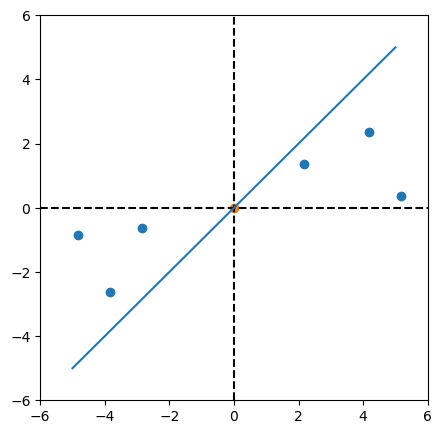

In [117]:
# Coefficients of the line equation ax + by + c = 0
a = 1
b = -1
c = 0

xs = np.linspace(-5, 5, 100)
ys = (-a * x - c) / b

plt.figure(figsize=(5, 5))
plt.ylim(-6, 6)
plt.xlim(-6, 6)

plt.scatter(dataset_centered["gene_1"], dataset_centered["gene_2"])
plt.scatter(dataset_centered.mean().values[0], dataset_centered.mean().values[1])
plt.axhline(y=0, color='black', linestyle='--')  # x-axis
plt.axvline(x=0, color='black', linestyle='--')  # y-axis
plt.plot(x, y)
plt.show()

Then, we project all points into the line, such that the projection is perpendicular to the line.

3.2666666507720947 3.2666666507720947


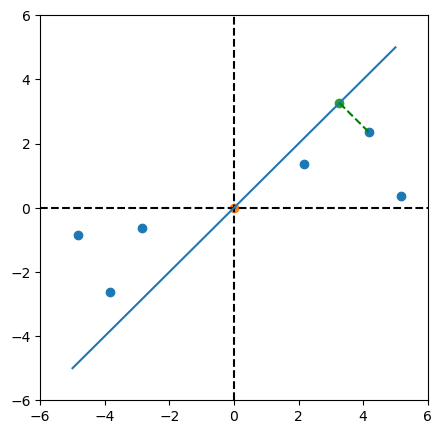

In [122]:
x_p, y_p = dataset_centered.iloc[0].values
x_proj = (b * (b * x_p - a * y_p) - a * c) / (a**2 + b**2)
y_proj = (a * (-b * x_p + a * y_p) - b * c) / (a**2 + b**2)

plt.figure(figsize=(5, 5))
plt.ylim(-6, 6)
plt.xlim(-6, 6)

plt.scatter(dataset_centered["gene_1"], dataset_centered["gene_2"])
plt.scatter(dataset_centered.mean().values[0], dataset_centered.mean().values[1])
plt.axhline(y=0, color='black', linestyle='--')  # x-axis
plt.axvline(x=0, color='black', linestyle='--')  # y-axis
plt.plot(x, y)

plt.plot([x_p, x_proj], [y_p, y_proj], color="green", linestyle="--", label="Projection Line")
plt.scatter(x_proj, y_proj)

print(x_proj, y_proj)
plt.show()

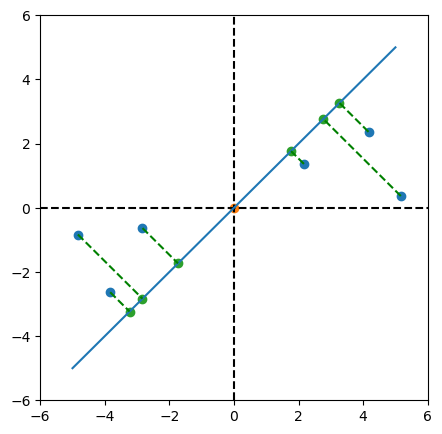

In [154]:
def project_point_onto_line(a, b, c, x_p, y_p):
    """
    Computes the coordinates of the point that is the perpendicular projection of a given point onto a line defined by the equation `ax + by + c = 0`.

    Parameters:
    -----------
    a : float, the coefficient of x in the line equation.
    b : float, the coefficient of y in the line equation.
    c : float, the constant term in the line equation.
    x_p : float, the x-coordinate of the point to be projected.
    y_p : float, the y-coordinate of the point to be projected.

    Returns:
    --------
    x_proj : float, the x-coordinate of the projected point on the line.
    y_proj : float, the y-coordinate of the projected point on the line.

    Notes:
    ------
    The line is assumed to be in the form `ax + by + c = 0`.
    The projection is calculated such that the line connecting the original point and its
    projection is perpendicular to the given line.
    """
    x_proj = (b * (b * x_p - a * y_p) - a * c) / (a**2 + b**2)
    y_proj = (a * (-b * x_p + a * y_p) - b * c) / (a**2 + b**2)
    return x_proj, y_proj


a = 1
b = -1
c = 0

x_projs = []
y_projs = []

for x_p, y_p in zip(
    dataset_centered["gene_1"].values, dataset_centered["gene_2"].values
):
    x_proj, y_proj = project_point_onto_line(a, b, c, x_p, y_p)
    x_projs.append(x_proj)
    y_projs.append(y_proj)


plt.figure(figsize=(5, 5))
plt.ylim(-6, 6)
plt.xlim(-6, 6)

# the axis
plt.axhline(y=0, color="black", linestyle="--")
plt.axvline(x=0, color="black", linestyle="--")

# the dataset and dataset mean
plt.scatter(dataset_centered["gene_1"], dataset_centered["gene_2"])
plt.scatter(dataset_centered.mean().values[0], dataset_centered.mean().values[1])

# the line
plt.plot(x, y)

# the projection
plt.scatter(x_projs, y_projs)  # points
for x_proj, y_proj, x_p, y_p in zip(
    x_projs,
    y_projs,
    dataset_centered["gene_1"].values,
    dataset_centered["gene_2"].values,
):
    plt.plot(
        [x_p, x_proj],
        [y_p, y_proj],
        color="green",
        linestyle="--",
        label="Projection Line",
    )  # lines


plt.show()

# Reference

- [A Beginner's Guide to Eigenvectors, Eigenvalues, PCA, Covariance and Entropy](https://wiki.pathmind.com/eigenvector) by pathmind
- [Eigenvector and Eigenvalue](https://www.mathsisfun.com/algebra/eigenvalue.html) by Math's Fun
- [ How to implement PCA (Principal Component Analysis) from scratch with Python](https://www.youtube.com/watch?v=Rjr62b_h7S4) by AssemblyAI